## Godfrey Okoth Otieno
## MSc. Computational Intelligence
### P52/33454/2019
## Supervisor: Dr. Wanjiku Nganga


### 1. Import the relevant libraries

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Visualization library
import warnings
sns.set() # Set the style of all graphs to seaborn one.This overrides the default matplotlib look with the seaborn one

warnings.filterwarnings('ignore') # Turn off warnings
pd.options.display.float_format = "{:,.3f}".format # Format float values to 3 decimal places in a dataframe 

In [2]:
# Load clustering libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler #For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import LabelEncoder #For Encoding categorical variables.
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_score, homogeneity_score #For computing the Silhouette Coefficient.
from sklearn import cluster,decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### 2. Load the data

In [3]:
# Enforce/align parser (UTF-8) encoding to the file's or handle invalid character
# dataURL = "../THESIS/KPLC_DATA/KPLC_Electricity_consumption_Data.csv"
# raw_data = pd.read_csv(dataURL,encoding='ISO-8859-1', index_col = 0)
raw_data = pd.read_csv('KPLC_Electricity_consumption_Data.csv',encoding='ISO-8859-1')

### 3. Data Exploration & Description

In [4]:
raw_data.head() # Display few rows and columns of the data frame

,ACCOUNT,SERVICE_POINT,CUSTOMER,TARIFF_CODE,TARIFF_DESC,METER_NO,MODEL_NAME,METER_TYPE,METER_MAKE,ENROLLMENT DATE,...,ACTIVE_UNITS_202012,ACTIVE_AMNT_202012,TOTAL_CONSUMPTION_202012,TOTAL_AMOUNT_202012,KVA_UNITS_202101,KVA_AMNT_202101,ACTIVE_UNITS_202101,ACTIVE_AMNT_202101,TOTAL_CONSUMPTION_202101,TOTAL_AMOUNT_202101
0,35453950,233233,GODFREY WANDERI NJOROGE,A0-1 DC-O,Domestic Method DC-O,"60,890,542.000",DTS27,ACTIVE,STAR INSTRUMENT,15-Jun-99,...,12.000,120.000,12.000,120.000,0.000,0.000,12.000,120.000,12.000,120.000
1,43739895,315274,REDEEMED GOSPEL CHURCH,A0-1 DC-L,Domestic Method DC-L,"448,869.000",C11B3T-H,ACTIVE,GEC,01-Mar-95,...,0.000,nan,0.000,nan,0.000,nan,0.000,nan,0.000,nan
2,30056055,2884577,REHEMA ALI KHAMIS,A0-1 DC-L,Domestic Method DC-L,"62,077,733.000",HXE12B,ACTIVE,HEXING,09-May-09,...,471.000,"7,441.800",471.000,"7,441.800",0.000,0.000,322.000,"5,087.600",322.000,"5,087.600"
3,33689649,4276780,JOHN MUNENE KABUGUA,A0-1 DC-L,Domestic Method DC-L,"61,054,938.000",HXE12,ELECTRONIC METER,HEXING,20-Dec-13,...,6.000,60.000,6.000,60.000,0.000,0.000,9.000,90.000,9.000,90.000
4,17275983,3476480,M/S MARIGAT P A G CHURCH,A0-1 DC-L,Domestic Method DC-L,"60,879,328.000",DDS26D,ACTIVE,STAR INSTRUMENT,27-Jul-11,...,141.000,"2,199.600",141.000,"2,199.600",0.000,0.000,161.000,"2,511.600",161.000,"2,511.600"


In [5]:
raw_data.describe() # Display statistical information for the numerical columns of the dataset  

,ACCOUNT,SERVICE_POINT,KVA_UNITS_202001,KVA_AMNT_202001,ACTIVE_UNITS_202001,ACTIVE_AMNT_202001,TOTAL_CONSUMPTION_202001,TOTAL_AMOUNT_202001,KVA_UNITS_202002,KVA_AMNT_202002,...,ACTIVE_UNITS_202012,ACTIVE_AMNT_202012,TOTAL_CONSUMPTION_202012,TOTAL_AMOUNT_202012,KVA_UNITS_202101,KVA_AMNT_202101,ACTIVE_UNITS_202101,ACTIVE_AMNT_202101,TOTAL_CONSUMPTION_202101,TOTAL_AMOUNT_202101
count,"100,000.000","100,000.000","99,985.000","76,185.000","99,985.000","76,185.000","100,000.000","76,185.000","99,984.000","75,591.000",...,"99,983.000","70,560.000","100,000.000","70,560.000","99,994.000","71,790.000","99,994.000","71,790.000","100,000.000","71,790.000"
mean,"32,823,469.847","2,965,892.753",0.530,338.860,118.143,"1,816.176",118.022,"1,817.489",0.525,339.317,...,86.802,"1,680.831",86.351,"1,688.879",0.514,339.184,99.256,"1,912.377",101.733,"1,933.563"
std,"13,905,180.167","1,552,227.730",32.194,"12,715.493","4,844.258","10,880.590","4,845.708","11,006.979",30.298,"12,280.505",...,561.844,"8,848.709",524.956,"8,965.617",33.548,"13,451.174",669.036,"10,602.925",683.440,"10,746.985"
min,"100,545.000","10,160.000",0.000,0.000,"-99,999.000","-1,137,084.600","-99,999.000","-1,137,084.600",0.000,0.000,...,"-22,475.000","-449,146.600","-22,475.000","-520,926.000",0.000,0.000,"-41,949.000","-624,084.200","-39,499.000","-624,084.200"
25%,"24,288,871.000","2,222,696.000",0.000,0.000,0.000,170.000,0.000,170.000,0.000,0.000,...,0.000,150.000,0.000,150.000,0.000,0.000,0.000,150.000,0.000,158.000
50%,"32,469,018.000","3,069,099.000",0.000,0.000,24.000,410.000,24.000,410.000,0.000,0.000,...,18.000,370.000,18.000,370.000,0.000,0.000,20.000,400.000,20.000,400.000
75%,"40,339,234.750","3,919,861.500",0.000,0.000,74.000,"1,130.000",74.000,"1,130.000",0.000,0.000,...,60.000,"1,030.000",60.000,"1,030.000",0.000,0.000,68.000,"1,140.000",69.000,"1,140.000"
max,"120,197,686.000","11,627,386.000","8,460.000","2,284,200.000","1,512,978.000","839,850.000","1,512,978.000","839,850.000","7,680.000","2,073,600.000",...,"71,512.000","927,856.800","59,478.000","927,856.800","9,000.000","2,430,000.000","70,082.000","768,003.600","70,082.000","768,003.600"


In [6]:
# Get some base information on our dataset
#print(data.shape)
print("Rows    : = ",raw_data.shape[0])
print("Columns : = ",raw_data.shape[1])
print("Features : \n ",raw_data.columns.tolist())
print("\nMissing Values :",raw_data.isnull().sum().values.sum())
print ("\nWhere the Missing Values are located :\n", raw_data.isnull().sum())
print("\nUnique Values  :\n",raw_data.nunique())

Rows    : =  100000
Columns : =  96
Features : 
  ['ACCOUNT', 'SERVICE_POINT', 'CUSTOMER', 'TARIFF_CODE', 'TARIFF_DESC', 'METER_NO', 'MODEL_NAME', 'METER_TYPE', 'METER_MAKE', 'ENROLLMENT DATE', 'DE-ENROLLMENT DATE', 'ACCOUNT_STATUS', 'CONTRACT_STATUS', 'POSTAL_ADDRESS', 'FEEDER_NAME', 'REGION', 'COUNTY', 'BRANCH', 'KVA_UNITS_202001', 'KVA_AMNT_202001', 'ACTIVE_UNITS_202001', 'ACTIVE_AMNT_202001', 'TOTAL_CONSUMPTION_202001', 'TOTAL_AMOUNT_202001', 'KVA_UNITS_202002', 'KVA_AMNT_202002', 'ACTIVE_UNITS_202002', 'ACTIVE_AMNT_202002', 'TOTAL_CONSUMPTION_202002', 'TOTAL_AMOUNT_202002', 'KVA_UNITS_202003', 'KVA_AMNT_202003', 'ACTIVE_UNITS_202003', 'ACTIVE_AMNT_202003', 'TOTAL_CONSUMPTION_202003', 'TOTAL_AMOUNT_202003', 'KVA_UNITS_202004', 'KVA_AMNT_202004', 'ACTIVE_UNITS_202004', 'ACTIVE_AMNT_202004', 'TOTAL_CONSUMPTION_202004', 'TOTAL_AMOUNT_202004', 'KVA_UNITS_202005', 'KVA_AMNT_202005', 'ACTIVE_UNITS_202005', 'ACTIVE_AMNT_202005', 'TOTAL_CONSUMPTION_202005', 'TOTAL_AMOUNT_202005', 'KVA_UNIT

In [7]:
raw_data.dtypes

ACCOUNT                       int64
SERVICE_POINT                 int64
CUSTOMER                     object
TARIFF_CODE                  object
TARIFF_DESC                  object
METER_NO                     object
MODEL_NAME                   object
METER_TYPE                   object
METER_MAKE                   object
ENROLLMENT DATE              object
DE-ENROLLMENT DATE           object
ACCOUNT_STATUS               object
CONTRACT_STATUS              object
POSTAL_ADDRESS               object
FEEDER_NAME                  object
REGION                       object
COUNTY                       object
BRANCH                       object
KVA_UNITS_202001            float64
KVA_AMNT_202001             float64
ACTIVE_UNITS_202001         float64
ACTIVE_AMNT_202001          float64
TOTAL_CONSUMPTION_202001      int64
TOTAL_AMOUNT_202001         float64
KVA_UNITS_202002            float64
KVA_AMNT_202002             float64
ACTIVE_UNITS_202002         float64
ACTIVE_AMNT_202002          

### 4. Correlation Analysis

In [8]:
# Create our Correlation Matrix on raw_data
raw_data.corr()

,ACCOUNT,SERVICE_POINT,KVA_UNITS_202001,KVA_AMNT_202001,ACTIVE_UNITS_202001,ACTIVE_AMNT_202001,TOTAL_CONSUMPTION_202001,TOTAL_AMOUNT_202001,KVA_UNITS_202002,KVA_AMNT_202002,...,ACTIVE_UNITS_202012,ACTIVE_AMNT_202012,TOTAL_CONSUMPTION_202012,TOTAL_AMOUNT_202012,KVA_UNITS_202101,KVA_AMNT_202101,ACTIVE_UNITS_202101,ACTIVE_AMNT_202101,TOTAL_CONSUMPTION_202101,TOTAL_AMOUNT_202101
ACCOUNT,1.000,0.076,-0.003,-0.007,-0.002,-0.010,-0.002,-0.010,-0.003,-0.007,...,-0.015,-0.012,-0.014,-0.013,-0.003,-0.004,-0.003,-0.007,-0.007,-0.010
SERVICE_POINT,0.076,1.000,-0.003,-0.003,-0.005,-0.003,-0.006,-0.004,-0.003,-0.003,...,-0.005,-0.003,-0.004,-0.003,-0.003,-0.003,0.002,0.001,0.001,0.000
KVA_UNITS_202001,-0.003,-0.003,1.000,0.913,0.821,-0.003,0.821,-0.003,0.995,0.893,...,-0.003,-0.004,-0.003,-0.004,0.993,0.914,-0.002,-0.003,-0.001,-0.003
KVA_AMNT_202001,-0.007,-0.003,0.913,1.000,0.642,-0.004,0.642,-0.004,0.913,0.988,...,-0.005,-0.006,-0.005,-0.006,0.901,0.978,-0.005,-0.006,-0.000,-0.006
ACTIVE_UNITS_202001,-0.002,-0.005,0.821,0.642,1.000,0.146,1.000,0.145,0.793,0.611,...,0.041,0.048,0.044,0.047,0.839,0.669,0.038,0.044,0.037,0.043
ACTIVE_AMNT_202001,-0.010,-0.003,-0.003,-0.004,0.146,1.000,0.146,0.989,-0.003,-0.005,...,0.345,0.425,0.374,0.419,-0.003,-0.005,0.346,0.410,0.340,0.408
TOTAL_CONSUMPTION_202001,-0.002,-0.006,0.821,0.642,1.000,0.146,1.000,0.149,0.793,0.611,...,0.041,0.048,0.044,0.047,0.838,0.668,0.038,0.044,0.037,0.043
TOTAL_AMOUNT_202001,-0.010,-0.004,-0.003,-0.004,0.145,0.989,0.149,1.000,-0.003,-0.005,...,0.342,0.420,0.371,0.415,-0.003,-0.005,0.342,0.405,0.337,0.404
KVA_UNITS_202002,-0.003,-0.003,0.995,0.913,0.793,-0.003,0.793,-0.003,1.000,0.906,...,-0.003,-0.004,-0.003,-0.004,0.989,0.916,-0.003,-0.004,-0.001,-0.004
KVA_AMNT_202002,-0.007,-0.003,0.893,0.988,0.611,-0.005,0.611,-0.005,0.906,1.000,...,-0.005,-0.006,-0.005,-0.006,0.883,0.971,-0.005,-0.006,0.000,-0.006


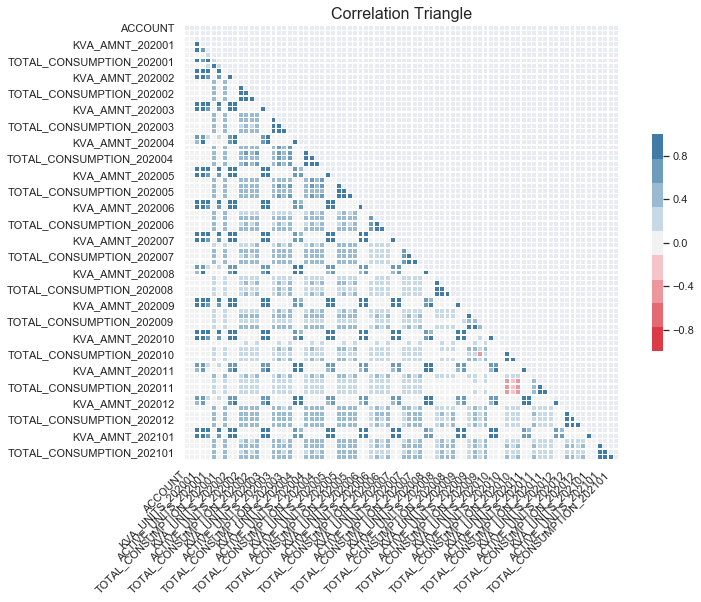

In [9]:
# Visualize: Generate Correlation plot or Heatmap
# Generate a mask for the upper triangle
mask = np.zeros_like(raw_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(raw_data.corr(), mask=mask,cmap=cmap,  vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

# Add title
ax.set_title("Correlation Triangle", fontsize=16)
plt.show()

### 5. Feature Engineering

In [10]:
work_data = raw_data.copy() # Create a working copy from the raw_data.

In [11]:
# Meter Numbers are being displayed as float. To correct this convert the METER_NO field as below
work_data['METER_NO'] = work_data['METER_NO'].astype(str).replace('\.0', '', regex=True)

In [12]:
pd.get_dummies(work_data, columns=["TARIFF_CODE"]).head()

,ACCOUNT,SERVICE_POINT,CUSTOMER,TARIFF_DESC,METER_NO,MODEL_NAME,METER_TYPE,METER_MAKE,ENROLLMENT DATE,DE-ENROLLMENT DATE,...,TARIFF_CODE_C1-3,TARIFF_CODE_C1-4,TARIFF_CODE_C2-3,TARIFF_CODE_C3-3,TARIFF_CODE_C5-11,TARIFF_CODE_C5-3,TARIFF_CODE_E0-1,TARIFF_CODE_P0-1 DC-L,TARIFF_CODE_P0-2 DC-O,TARIFF_CODE_P1-2 SC
0,35453950,233233,GODFREY WANDERI NJOROGE,Domestic Method DC-O,60890542,DTS27,ACTIVE,STAR INSTRUMENT,15-Jun-99,NaN,...,0,0,0,0,0,0,0,0,0,0
1,43739895,315274,REDEEMED GOSPEL CHURCH,Domestic Method DC-L,448869,C11B3T-H,ACTIVE,GEC,01-Mar-95,NaN,...,0,0,0,0,0,0,0,0,0,0
2,30056055,2884577,REHEMA ALI KHAMIS,Domestic Method DC-L,62077733,HXE12B,ACTIVE,HEXING,09-May-09,NaN,...,0,0,0,0,0,0,0,0,0,0
3,33689649,4276780,JOHN MUNENE KABUGUA,Domestic Method DC-L,61054938,HXE12,ELECTRONIC METER,HEXING,20-Dec-13,NaN,...,0,0,0,0,0,0,0,0,0,0
4,17275983,3476480,M/S MARIGAT P A G CHURCH,Domestic Method DC-L,60879328,DDS26D,ACTIVE,STAR INSTRUMENT,27-Jul-11,NaN,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Reduce the number of columns. We do this by computing the averages of the columns KVA_UNITS,KVA_AMNT,ACTIVE_UNITS,ACTIVE_AMNT
# TOTAL_CONSUMPTION and TOTAL_AMOUNT
# Where column values are null(NaN) we replace with zero(0)
COL_KVA_UNITS = work_data.loc[:,work_data.columns.str.startswith('KVA_UNITS')].fillna(0)
work_data['AVG_KVA_UNITS']  = COL_KVA_UNITS.mean(axis=1)

COL_ACTIVE_UNITS = work_data.loc[:,work_data.columns.str.startswith('ACTIVE_UNITS')].fillna(0)
work_data['AVG_ACTIVE_UNITS']  = COL_ACTIVE_UNITS.mean(axis=1)

COL_TOTAL_CONSUMPTION = work_data.loc[:,work_data.columns.str.startswith('TOTAL_CONSUMPTION')].fillna(0)
work_data['AVG_CONSUMPTION']  = COL_TOTAL_CONSUMPTION.mean(axis=1)

COL_KVA_UNITS = work_data.loc[:,work_data.columns.str.startswith('KVA_UNITS')].fillna(0)
work_data['TOTAL_KVA_UNITS']  = COL_KVA_UNITS.sum(axis=1)

COL_ACTIVE_UNITS = work_data.loc[:,work_data.columns.str.startswith('ACTIVE_UNITS')].fillna(0)
work_data['TOTAL_ACTIVE_UNITS']  = COL_ACTIVE_UNITS.sum(axis=1)

COL_TOTAL_CONSUMPTION = work_data.loc[:,work_data.columns.str.startswith('TOTAL_CONSUMPTION')].fillna(0)
work_data['_TOTAL_CONSUMPTION']  = COL_TOTAL_CONSUMPTION.sum(axis=1)

COL_KVA_AMNT = work_data.loc[:,work_data.columns.str.startswith('KVA_AMNT')].fillna(0)
work_data['TOTAL_KVA_AMNT']  = COL_KVA_AMNT.sum(axis=1)

COL_ACTIVE_AMNT = work_data.loc[:,work_data.columns.str.startswith('ACTIVE_AMNT')].fillna(0)
work_data['TOTAL_ACTIVE_AMNT']  = COL_ACTIVE_AMNT.sum(axis=1)

COL_TOTAL_AMOUNT = work_data.loc[:,work_data.columns.str.startswith('TOTAL_AMOUNT')].fillna(0)
work_data['_TOTAL_AMOUNT']  = COL_TOTAL_AMOUNT.sum(axis=1)

work_data = work_data.loc[:, ~work_data.columns.str.startswith('KVA_UNITS')]
work_data = work_data.loc[:, ~work_data.columns.str.startswith('KVA_AMNT')]
work_data = work_data.loc[:, ~work_data.columns.str.startswith('ACTIVE_UNITS')]
work_data = work_data.loc[:, ~work_data.columns.str.startswith('ACTIVE_AMNT')]
work_data = work_data.loc[:, ~work_data.columns.str.startswith('TOTAL_CONSUMPTION')]
work_data = work_data.loc[:, ~work_data.columns.str.startswith('TOTAL_AMOUNT')]

In [14]:
work_data.shape

(100000, 27)

In [15]:
# Create our Correlation Matrix on work_data
work_data.corr()

,ACCOUNT,SERVICE_POINT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION,TOTAL_KVA_AMNT,TOTAL_ACTIVE_AMNT,_TOTAL_AMOUNT
ACCOUNT,1.000,0.076,-0.003,-0.005,-0.010,-0.003,-0.005,-0.010,-0.005,-0.015,-0.017
SERVICE_POINT,0.076,1.000,-0.002,-0.005,-0.006,-0.002,-0.005,-0.006,-0.002,-0.003,-0.003
AVG_KVA_UNITS,-0.003,-0.002,1.000,0.327,0.545,1.000,0.327,0.545,0.903,-0.005,-0.005
AVG_ACTIVE_UNITS,-0.005,-0.005,0.327,1.000,0.590,0.327,1.000,0.590,0.237,0.402,0.402
AVG_CONSUMPTION,-0.010,-0.006,0.545,0.590,1.000,0.545,0.590,1.000,0.399,0.670,0.671
TOTAL_KVA_UNITS,-0.003,-0.002,1.000,0.327,0.545,1.000,0.327,0.545,0.903,-0.005,-0.005
TOTAL_ACTIVE_UNITS,-0.005,-0.005,0.327,1.000,0.590,0.327,1.000,0.590,0.237,0.402,0.402
_TOTAL_CONSUMPTION,-0.010,-0.006,0.545,0.590,1.000,0.545,0.590,1.000,0.399,0.670,0.671
TOTAL_KVA_AMNT,-0.005,-0.002,0.903,0.237,0.399,0.903,0.237,0.399,1.000,-0.006,-0.006
TOTAL_ACTIVE_AMNT,-0.015,-0.003,-0.005,0.402,0.670,-0.005,0.402,0.670,-0.006,1.000,0.999


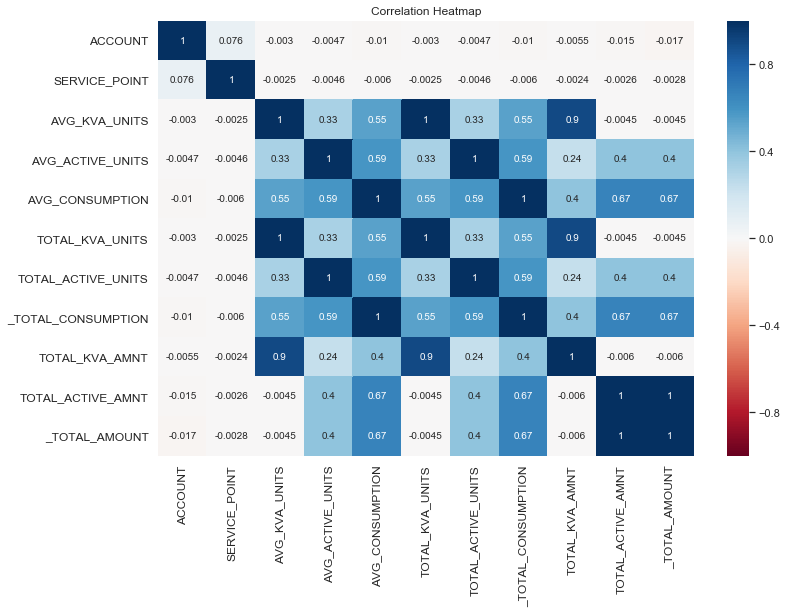

In [16]:
# We'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# We use RdBu as a color scheme, we can also use viridis, Blues, YlGnBu or many others.
# We set the range from -1 to 1, as it is the range of the Pearson Correlation. 
# Otherwise the function infers the boundaries from the input.
plt.figure(figsize = (12, 8))
s = sns.heatmap(work_data.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

### 6. Plot the data

In [17]:
#customer_counts_per_tariff =work_data.groupby('TARIFF_CODE').size().reset_index(name='ACCOUNT').sort_values(['ACCOUNT'], ascending=True)
customer_counts_per_tariff = work_data.groupby('TARIFF_CODE').count()[['ACCOUNT']]

kva_units_per_tariff = pd.pivot_table(data=work_data,index='TARIFF_CODE',values='TOTAL_KVA_UNITS',aggfunc=np.sum)
active_units_per_tariff = pd.pivot_table(data=work_data,index='TARIFF_CODE',values='TOTAL_ACTIVE_UNITS',aggfunc=np.sum)
consumption_per_tariff = pd.pivot_table(data=work_data,index='TARIFF_CODE',values='_TOTAL_CONSUMPTION',aggfunc=np.sum)


kva_revenue_per_tariff = pd.pivot_table(data=work_data,index='TARIFF_CODE',values='TOTAL_KVA_AMNT',aggfunc=np.sum)
active_revenue_per_tariff = pd.pivot_table(data=work_data,index='TARIFF_CODE',values='TOTAL_ACTIVE_AMNT',aggfunc=np.sum)
revenue_per_tariff = pd.pivot_table(data=work_data,index='TARIFF_CODE',values='_TOTAL_AMOUNT',aggfunc=np.sum)

table = pd.concat([customer_counts_per_tariff,kva_units_per_tariff,active_units_per_tariff,consumption_per_tariff,
                  kva_revenue_per_tariff,active_revenue_per_tariff,revenue_per_tariff],axis = 1)
table

,ACCOUNT,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION,TOTAL_KVA_AMNT,TOTAL_ACTIVE_AMNT,_TOTAL_AMOUNT
TARIFF_CODE,,,,,,,
A0-1,147,0.000,"158,645.000","164,759.000",0.000,"2,171,212.600","2,171,212.600"
A0-1 DC-L,71371,"312,613.000","81,016,936.000","83,623,950.300","177,065,118.000","1,129,344,177.130","1,134,323,061.680"
A0-1 DC-O,10911,"142,162.000","15,646,704.000","15,924,945.000","58,577,600.000","196,696,371.930","198,336,923.330"
A0-2,2,0.000,212.000,212.000,0.000,"1,824.200","1,824.200"
A0-2 DC-L,594,"8,186.000","978,513.000","981,146.000","5,687,200.000","13,858,247.400","13,900,533.200"
A0-2 DC-O,554,925.000,"1,167,039.000","1,202,133.000",0.000,"16,606,169.480","17,018,525.680"
A1-1,14,0.000,"51,964.000","51,964.000",0.000,"776,974.400","776,974.400"
A1-1 SC1,10519,"127,853.000","13,042,753.000","12,983,458.000","48,674,450.080","179,039,305.720","179,713,129.720"
A1-1 SC2,3297,"17,738.000","3,938,760.000","3,962,473.000","9,335,400.000","52,814,238.080","53,263,986.880"


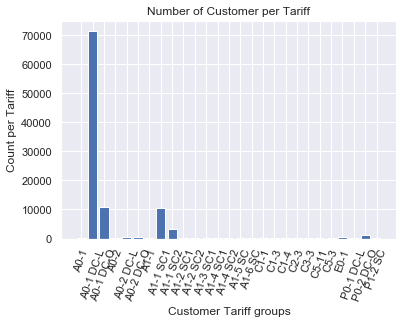

In [18]:
# Number of Customer per Tariff
plt.bar(table.index,customer_counts_per_tariff['ACCOUNT']) #bar graph
plt.xticks(rotation=70)#xticks  
plt.xlabel('Customer Tariff groups') #x-axis labels 
plt.ylabel('Count per Tariff') #y-axis labels
plt.title('Number of Customer per Tariff') #plot title
plt.show();#display 

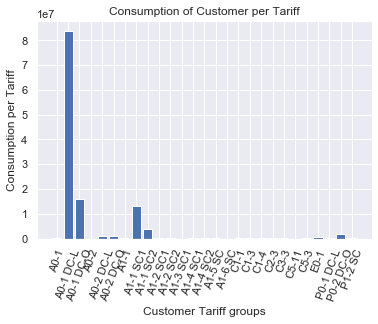

In [19]:
# Consumption of Customer per Tariff
plt.bar(table.index,consumption_per_tariff['_TOTAL_CONSUMPTION']) #bar graph
plt.xticks(rotation=70)#xticks  
plt.xlabel('Customer Tariff groups') #x-axis labels 
plt.ylabel('Consumption per Tariff') #y-axis labels
plt.title('Consumption of Customer per Tariff') #plot title
plt.show();#display

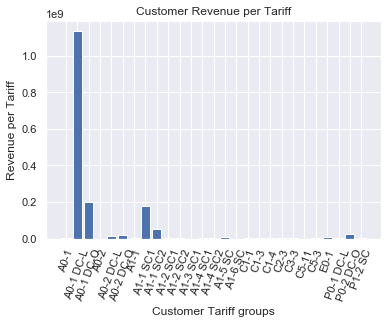

In [20]:
# Customer Revenue per Tariff
plt.bar(table.index,revenue_per_tariff['_TOTAL_AMOUNT']) #bar graph
plt.xticks(rotation=70)#xticks  
plt.xlabel('Customer Tariff groups') #x-axis labels 
plt.ylabel('Revenue per Tariff') #y-axis labels
plt.title('Customer Revenue per Tariff') #plot title
plt.show();#display

### 7. Select the features

In [21]:
# ----- RAW_DATA ------------
#x1= raw_data.iloc[:,0].fillna(0)
#x2= raw_data.iloc[:,18:96].fillna(0)
#x3 = pd.concat([x1,x2],axis = 1)

# ---WORK_DATA-------------
#x1= raw_data.iloc[:,0].fillna(0)
#x2= work_data.iloc[:,18:27].fillna(0)
x1= work_data.iloc[:,0]
x2= work_data.iloc[:,18:24]
x3 = pd.concat([x1,x2],axis = 1)
x3.head()

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION
0,35453950,0.000,12.308,12.308,0.000,160.000,160.000
1,43739895,0.000,0.077,0.077,0.000,1.000,1.000
2,30056055,0.000,285.077,285.077,0.000,"3,706.000","3,706.000"
3,33689649,0.000,6.462,6.462,0.000,84.000,84.000
4,17275983,0.000,173.000,173.000,0.000,"2,249.000","2,249.000"


In [22]:
# Our selected features
features_to_explore = ['AVG_KVA_UNITS','AVG_ACTIVE_UNITS','AVG_CONSUMPTION','TOTAL_KVA_UNITS','TOTAL_ACTIVE_UNITS','_TOTAL_CONSUMPTION']

# Let's create two new dataframes with our new data called customer_data and another where we do a groupby on customer_data (ACCOUNT)
customer_data = x3.dropna(axis=0)[features_to_explore + ['ACCOUNT']]
customer_groups = x3.groupby('ACCOUNT').mean().reset_index().dropna(axis=0)

In [23]:
customer_data.head()

,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION,ACCOUNT
0,0.000,12.308,12.308,0.000,160.000,160.000,35453950
1,0.000,0.077,0.077,0.000,1.000,1.000,43739895
2,0.000,285.077,285.077,0.000,"3,706.000","3,706.000",30056055
3,0.000,6.462,6.462,0.000,84.000,84.000,33689649
4,0.000,173.000,173.000,0.000,"2,249.000","2,249.000",17275983


In [24]:
customer_data.shape

(100000, 7)

In [25]:
customer_groups.head()

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION
0,100545,0.000,34.462,34.462,0.000,448.000,448.000
1,102855,0.000,2.077,2.077,0.000,27.000,27.000
2,103366,0.000,0.462,0.462,0.000,6.000,6.000
3,103960,0.000,212.308,212.308,0.000,"2,760.000","2,760.000"
4,106219,0.000,660.308,660.308,0.000,"8,584.000","8,584.000"


In [26]:
customer_groups.shape

(100000, 7)

In [27]:
customer_groups.describe()

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION
count,"100,000.000","100,000.000","100,000.000","100,000.000","100,000.000","100,000.000","100,000.000"
mean,"32,823,469.847",0.476,92.032,94.264,6.184,"1,196.413","1,225.426"
std,"13,905,180.167",25.548,842.659,508.069,332.129,"10,954.571","6,604.897"
min,"100,545.000",0.000,"-211,243.385","-7,591.615",0.000,"-2,746,164.000","-98,691.000"
25%,"24,288,871.000",0.000,9.769,9.769,0.000,127.000,127.000
50%,"32,469,018.000",0.000,30.154,30.231,0.000,392.000,393.000
75%,"40,339,234.750",0.000,75.692,75.923,0.000,984.000,987.000
max,"120,197,686.000","6,073.846","116,382.923","116,382.923","78,960.000","1,512,978.000","1,512,978.000"


### Standardizing our data

In [28]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case _TOTAL_CONSUMPTION would be considered much more important than the rest of the features for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
customer_groups_std = customer_groups.copy()
cols = ['AVG_KVA_UNITS','AVG_ACTIVE_UNITS','AVG_CONSUMPTION','TOTAL_KVA_UNITS','TOTAL_ACTIVE_UNITS','_TOTAL_CONSUMPTION']

customer_groups_std[cols] = preprocessing.scale(customer_groups_std[cols])

customer_groups_std.head()

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION
0,100545,-0.019,-0.068,-0.118,-0.019,-0.068,-0.118
1,102855,-0.019,-0.107,-0.181,-0.019,-0.107,-0.181
2,103366,-0.019,-0.109,-0.185,-0.019,-0.109,-0.185
3,103960,-0.019,0.143,0.232,-0.019,0.143,0.232
4,106219,-0.019,0.674,1.114,-0.019,0.674,1.114


In [29]:
customer_groups_std.describe()

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION
count,"100,000.000","100,000.000","100,000.000","100,000.000","100,000.000","100,000.000","100,000.000"
mean,"32,823,469.847",0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,"13,905,180.167",1.000,1.000,1.000,1.000,1.000,1.000
min,"100,545.000",-0.019,-250.797,-15.128,-0.019,-250.797,-15.128
25%,"24,288,871.000",-0.019,-0.098,-0.166,-0.019,-0.098,-0.166
50%,"32,469,018.000",-0.019,-0.073,-0.126,-0.019,-0.073,-0.126
75%,"40,339,234.750",-0.019,-0.019,-0.036,-0.019,-0.019,-0.036
max,"120,197,686.000",237.721,138.005,228.885,237.721,138.005,228.885


### 8. Clustering

#### K-Means Clustering

#### 1. Elbow Method

In [30]:
# Perform K-means clustering. We consider 1 to 15 clusters, so our for loop runs 14 iterations.
# In addition we run the algortihm at many different starting points - k means++. 
# And we set a random state for reproducibility.
wcss = [] # Initialize the wcss variable by making it an empty list 
for i in range(1,15): # Run a for loop trying out several clustering solutions calculating the wcss and adding the values to the above list
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter=300,n_init=10, random_state = 50)
    kmeans.fit(customer_groups_std)
    wcss.append(kmeans.inertia_)

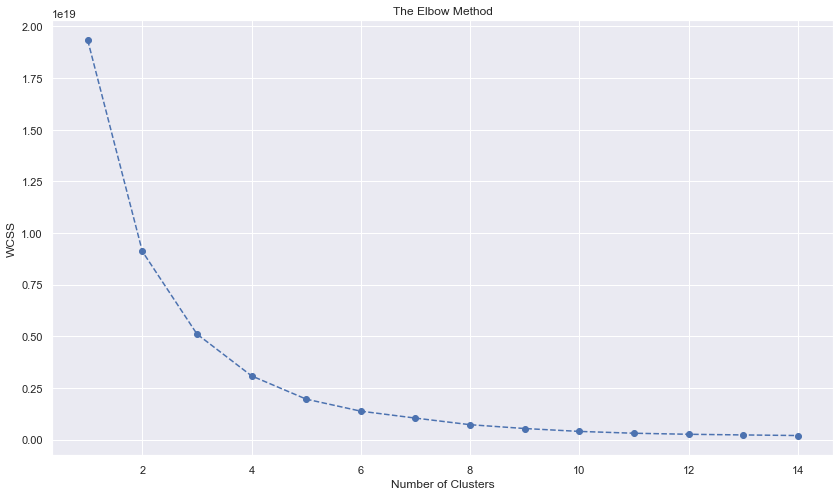

In [31]:
# Plot the Within Cluster Sum of Squares for different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graph, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (14,8))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### 2. Silhouette Coefficient

In [32]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(customer_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(customer_groups_std[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.9989610620446966
For n_clusters=3, The Silhouette Coefficient is 0.9985434333709022
For n_clusters=4, The Silhouette Coefficient is 0.9605618612392091
For n_clusters=5, The Silhouette Coefficient is 0.9614419009390472
For n_clusters=6, The Silhouette Coefficient is 0.9331704201495524
For n_clusters=7, The Silhouette Coefficient is 0.9335536629716633
For n_clusters=8, The Silhouette Coefficient is 0.8795289533425824
For n_clusters=9, The Silhouette Coefficient is 0.8824312625393832
For n_clusters=10, The Silhouette Coefficient is 0.8442623762753116


In [33]:
# Let's take k to be 3 clusters
num_k = 3
kmeans = cluster.KMeans(n_clusters=num_k,init='k-means++', max_iter=300,n_init=10, random_state=42)
identified_clusters = kmeans.fit_predict(customer_groups_std)

In [34]:
#identified_clusters = list(set(identified_clusters))
#identified_clusters

In [35]:
data_with_clusters = customer_groups_std.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters.head()

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION,Clusters
0,100545,-0.019,-0.068,-0.118,-0.019,-0.068,-0.118,0
1,102855,-0.019,-0.107,-0.181,-0.019,-0.107,-0.181,0
2,103366,-0.019,-0.109,-0.185,-0.019,-0.109,-0.185,0
3,103960,-0.019,0.143,0.232,-0.019,0.143,0.232,0
4,106219,-0.019,0.674,1.114,-0.019,0.674,1.114,0


In [36]:
#identified_clusters = list(set(identified_clusters))
#identified_clusters
data_with_clusters['Clusters'].unique()

array([0, 2, 1], dtype=int64)

### 9. Cluster Analysis

In [37]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_clust_kmeans = customer_groups.copy()
df_clust_kmeans['Cluster K-means'] = kmeans.labels_

In [38]:
# Calculate mean values for the clusters
df_clust_analysis = df_clust_kmeans.groupby(['Cluster K-means']).mean()
df_clust_analysis

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION
Cluster K-means,,,,,,,
0,"21,506,852.833",0.735,113.741,118.786,9.553,"1,478.633","1,544.213"
1,"75,783,006.101",1.767,250.712,250.119,22.975,"3,259.252","3,251.541"
2,"39,474,049.029",0.177,63.723,63.796,2.295,828.404,829.344


In [39]:
# let’s see the number of customers in each of the clusters and their proportions:
df_clust_analysis['Number of Customers'] = df_clust_kmeans[['Cluster K-means','ACCOUNT']].groupby(['Cluster K-means']).count()
df_clust_analysis['Proportion of Customers'] = df_clust_analysis['Number of Customers'] / df_clust_analysis['Number of Customers'].sum()
df_clust_analysis

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION,Number of Customers,Proportion of Customers
Cluster K-means,,,,,,,,,
0,"21,506,852.833",0.735,113.741,118.786,9.553,"1,478.633","1,544.213",43886,0.439
1,"75,783,006.101",1.767,250.712,250.119,22.975,"3,259.252","3,251.541",3400,0.034
2,"39,474,049.029",0.177,63.723,63.796,2.295,828.404,829.344,52714,0.527


In [40]:
# Rename the clusters accordingly from the analysis results
df_clust_analysis.rename({0:'Commercial Customers',
                          1:'Industrial(Large Power) Customers',
                          2:'Domestic(Standard Power) Customers'})

,ACCOUNT,AVG_KVA_UNITS,AVG_ACTIVE_UNITS,AVG_CONSUMPTION,TOTAL_KVA_UNITS,TOTAL_ACTIVE_UNITS,_TOTAL_CONSUMPTION,Number of Customers,Proportion of Customers
Cluster K-means,,,,,,,,,
Commercial Customers,"21,506,852.833",0.735,113.741,118.786,9.553,"1,478.633","1,544.213",43886,0.439
Industrial(Large Power) Customers,"75,783,006.101",1.767,250.712,250.119,22.975,"3,259.252","3,251.541",3400,0.034
Domestic(Standard Power) Customers,"39,474,049.029",0.177,63.723,63.796,2.295,828.404,829.344,52714,0.527


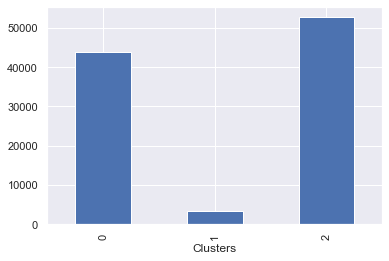

In [41]:
# Plot our Cluster Counts
data_with_clusters.groupby('Clusters')['ACCOUNT'].agg('count').plot(kind='bar')

In [42]:
# Add the segment labels to our table
df_clust_kmeans['Labels'] = df_clust_kmeans['Cluster K-means'].map({0:'Commercial Customers',
                          1:'Industrial(Large Power) Customers',
                          2:'Domestic(Standard Power) Customers'})

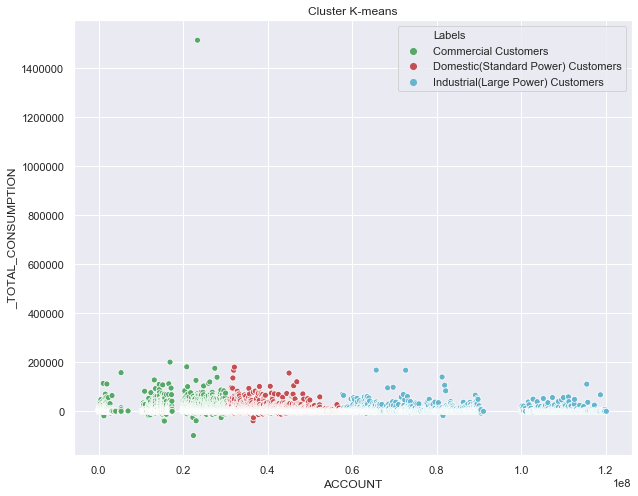

In [43]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_clust_kmeans['ACCOUNT']
y_axis = df_clust_kmeans['_TOTAL_CONSUMPTION']
plt.figure(figsize = (10, 8))
#sns.scatterplot(x_axis, y_axis, hue = df_clust_kmeans['Labels'], palette = ['g', 'r', 'c', 'm','b'])
sns.scatterplot(x_axis, y_axis, hue = df_clust_kmeans['Labels'], palette = ['g', 'r', 'c'])
plt.title('Cluster K-means')
plt.show()

### 10. K-Means Clustering with PCA

In [44]:
# let’s see the number of customers in each of the clusters:
clustered_customers = pd.DataFrame(customer_groups_std)
clustered_customers['cluster'] = identified_clusters
clustered_customers['cluster'].value_counts(ascending =True)

1     3400
0    43886
2    52714
Name: cluster, dtype: int64

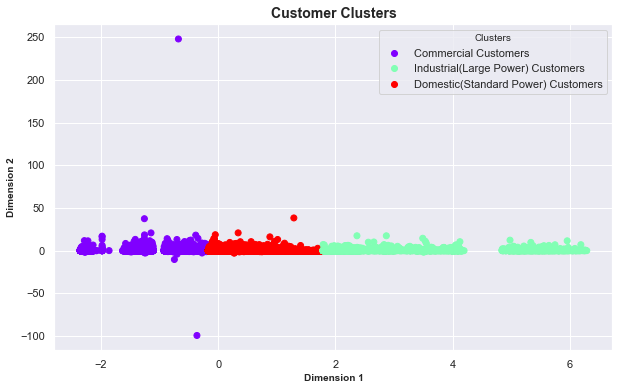

In [45]:
# Principal Component Analysis for Visualization
pca = decomposition.PCA(n_components=2, whiten=True)
data_with_clusters['x'] = pca.fit_transform(data_with_clusters)[:, 0]
data_with_clusters['y'] = pca.fit_transform(data_with_clusters)[:, 1]
plt.figure(figsize=(10,6))
scatter = plt.scatter(data_with_clusters['x'], data_with_clusters['y'],c=data_with_clusters['Clusters'],cmap='rainbow')

plt.title('Customer Clusters', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')
L = plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
L.get_texts()[0].set_text('Commercial Customers')
L.get_texts()[1].set_text('Industrial(Large Power) Customers')
L.get_texts()[2].set_text('Domestic(Standard Power) Customers')
plt.show()

#### 10.1 Testing the model with sample data

In [46]:
sample_test_1 = [(20803318,-0.018618,-0.105839,-0.179932,-0.018618,-0.105839,-0.179932)]
sample_test_2 = [(91870452,-0.018616,-0.092330,-0.157524,-0.018618,-0.092500,-0.157524)]
sample_test_3 = [(10891454,-0.018618, 0.049440, 0.371934,-0.018618, 0.049440, 0.371934)]

sample_test = pd.read_csv('Test_Sample.csv')

In [47]:
customer_prediction = kmeans.predict(sample_test_1)

In [48]:
customer_prediction

array([0])

### 11. Clusters Mapping with the Actual Customer Tariff Classification

In [49]:
# Map the Customer tariff Categories with the Identified Clusters
cluster_map = customer_groups.copy()
cluster_map['Tariff_Category'] = work_data.iloc[:,4]
cluster_map['cluster'] = kmeans.labels_

cluster_1 = cluster_map[cluster_map.cluster == 0]
cluster_2 = cluster_map[cluster_map.cluster == 1]
cluster_3 = cluster_map[cluster_map.cluster == 2]

# Customer count per Tariff per cluster
Cluster1_customer_counts_per_tariff = cluster_1.groupby('Tariff_Category').count()[['ACCOUNT']]
Cluster2_customer_counts_per_tariff = cluster_2.groupby('Tariff_Category').count()[['ACCOUNT']]
Cluster3_customer_counts_per_tariff = cluster_3.groupby('Tariff_Category').count()[['ACCOUNT']]

# Rename the columns
Cluster1_customer_counts_per_tariff.columns = ['Commercial Customers']
Cluster2_customer_counts_per_tariff.columns = ['Industrial(Large Power) Customers']
Cluster3_customer_counts_per_tariff.columns = ['Domestic(Standard Power) Customers']

# Merge the columns into one table
customer_counts_per_tariff_per_cluster = pd.concat([Cluster1_customer_counts_per_tariff,Cluster2_customer_counts_per_tariff,Cluster3_customer_counts_per_tariff],axis = 1)

customer_counts_per_tariff_per_cluster

customer_counts_per_tariff_per_cluster["Number of Customers"] = customer_counts_per_tariff_per_cluster.sum(axis=1)

customer_counts_per_tariff_per_cluster.fillna(0)

,Commercial Customers,Industrial(Large Power) Customers,Domestic(Standard Power) Customers,Number of Customers
Big Industrial Method CI2 - High/low rate,3.000,0.000,12.000,15.000
Big Industrial Method CI3 - High/low rate,1.000,1.000,1.000,3.000
Big Industrial Method CI5 - High/low rate,0.000,0.000,2.000,2.000
C5-11 Big Industrial Method CI5,0.000,1.000,0.000,1.000
Commercial-Industrial Method CI1,5.000,0.000,6.000,11.000
Commercial-Industrial Method CI1 - High/low rate,54.000,9.000,58.000,121.000
Commercial-Industrial Method CI1 - Nameplate - High/Low rate,1.000,0.000,2.000,3.000
Domestic Method DC (OLD),71.000,4.000,72.000,147.000
Domestic Method DC-IT (OLD),1.000,0.000,1.000,2.000
Domestic Method DC-L,"31,242.000","2,430.000","37,699.000","71,371.000"


### 12. Clustering Performance Evaluation

#### 12.1 Silhouette Coefficient

In [50]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
tariff_label_data = raw_data.copy()
#tariff_label_data['tariff_label'] = labelencoder.fit_transform(tariff_label_data['TARIFF_CODE'])
labels_true = labelencoder.fit_transform(tariff_label_data['TARIFF_CODE'])

In [51]:
kmeans_model = KMeans(n_clusters = 3, random_state = 1).fit(customer_groups_std)
labels_pred = kmeans_model.labels_

In [52]:
#labels_pred = labels_true[:]

In [53]:
silhouette_score(customer_groups_std, labels_pred, metric = 'euclidean')

0.5646005542599505

In [54]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.00035539444563387814

In [55]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred) 

3.0388300368429207e-05

In [56]:
metrics.homogeneity_score(labels_true, labels_pred)


0.00027523270655764576

In [57]:
metrics.completeness_score(labels_true, labels_pred)
             

0.0003518353126657282

In [58]:
metrics.v_measure_score(labels_true, labels_pred)

0.00030885512384278945

In [59]:
metrics.homogeneity_completeness_v_measure(labels_true, labels_pred)

(0.00027523270655764576, 0.0003518353126657282, 0.00030885512384278945)

In [60]:
 metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.501875342731891

In [61]:
    print('1. adjusted_rand_score: %f'%metrics.adjusted_rand_score(labels_true, labels_pred))
    print('2. silhouette_score: %f'%metrics.silhouette_score(customer_groups_std, labels_pred, metric='euclidean', sample_size=100000))
    print('3. homogeneity_score: %f'%metrics.homogeneity_score(labels_true, labels_pred))
    print('4. completeness_score: %f'%metrics.completeness_score(labels_true, labels_pred))
    print('5. v_measure_score: %f'%metrics.v_measure_score(labels_true, labels_pred))
   # print('6. homogeneity_completeness_v_measure:'%metrics.homogeneity_completeness_v_measure(labels_true, labels_pred))
    print('6. fowlkes_mallows_score: %f'%metrics.fowlkes_mallows_score(labels_true, labels_pred))    
    print('7. adjusted_mutual_info_score: %f'%metrics.adjusted_mutual_info_score(labels_true,  labels_pred))
   
  

1. adjusted_rand_score: 0.000355
2. silhouette_score: 0.564601
3. homogeneity_score: 0.000275
4. completeness_score: 0.000352
5. v_measure_score: 0.000309
6. fowlkes_mallows_score: 0.501875
7. adjusted_mutual_info_score: 0.000030
